<a href="https://colab.research.google.com/github/aryan-panja/ACE-GFG-ADOBE/blob/main/Case1GFG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opencv-python numpy
!pip install opencv-python-headless numpy matplotlib

# Step 3: Shape detection code
import cv2
import numpy as np
from matplotlib import pyplot as plt


Output image saved as output_labeled.png


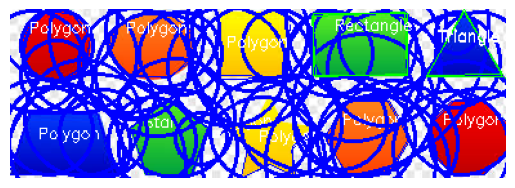

Output image saved as output_labeled.png


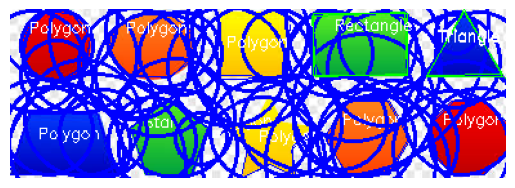

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_shapes(image_path):
    # Load the image
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Edge detection
    edges = cv2.Canny(blurred, 50, 150)

    # Find contours
    contours, _ = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    for contour in contours:
        # Approximate the contour
        epsilon = 0.02 * cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, epsilon, True)

        # Get the number of vertices
        num_vertices = len(approx)

        # Draw the contour with smaller thickness
        contour_thickness = 1  # Reduced thickness
        cv2.drawContours(image, [approx], 0, (0, 255, 0), contour_thickness)  # Green for contours

        # Identify shapes and label
        if num_vertices == 2:
            label = "Line"
        elif num_vertices == 3:
            label = "Triangle"
        elif num_vertices == 4:
            # It's a rectangle or square
            x, y, w, h = cv2.boundingRect(approx)
            aspect_ratio = float(w) / h
            if 0.9 <= aspect_ratio <= 1.1:
                label = "Square"
            else:
                label = "Rectangle"
        elif num_vertices > 4:
            # Identify polygons and stars
            if num_vertices == 5:
                label = "Star"
            else:
                label = "Polygon"
            # Draw polygons with smaller thickness
            cv2.drawContours(image, [approx], -1, (255, 0, 0), contour_thickness)  # Blue for polygons

        else:
            # Detect circles
            circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, dp=1.0, minDist=20,
                                       param1=50, param2=30, minRadius=0, maxRadius=0)
            if circles is not None:
                circles = np.round(circles[0, :]).astype("int")
                for (x, y, r) in circles:
                    # Change circle color to blue
                    cv2.circle(image, (x, y), r, (255, 0, 0), 2)  # Blue color for circles
                label = "Circle"
            else:
                label = "Unknown"

        # Calculate centroid and draw the label with smaller font scale
        M = cv2.moments(contour)
        if M["m00"] != 0:  # Check to avoid division by zero
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])
            font_scale = 0.4  # Smaller font scale
            font_thickness = 1  # Smaller font thickness
            cv2.putText(image, label, (cX - 20, cY - 10), cv2.FONT_HERSHEY_SIMPLEX, font_scale, (255, 255, 255), font_thickness)
        else:
            print("Warning: Zero contour area detected, skipping labeling.")

    # Save the output image
    output_path = 'output_labeled.png'
    cv2.imwrite(output_path, image)
    print(f"Output image saved as {output_path}")

    # Display the result
    img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

# Run shape detection
image_path = 'shapes.png'  # Ensure this is the correct path to your image
detect_shapes(image_path)


NameError: name 'files' is not defined